In [26]:
# Use a pipeline as a high-level helper
from transformers import pipeline
from transformers import AutoImageProcessor, AutoModelForObjectDetection, DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests
import torch


In [27]:
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
# Load model directly

processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


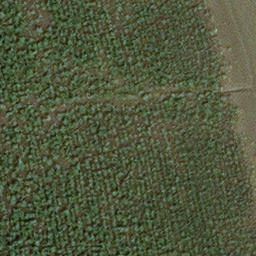

In [29]:
img = Image.open('/home/blackteukbeu/Downloads/DataSet/canape/archive/Forest Segmented/Forest Segmented/images/855_sat_01.jpg')
img

In [30]:
# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=img, return_tensors="pt")
outputs = model(**inputs)

In [31]:
# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([img.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

In [32]:
results

{'scores': tensor([], grad_fn=<IndexBackward0>),
 'labels': tensor([], dtype=torch.int64),
 'boxes': tensor([], size=(0, 4), grad_fn=<IndexBackward0>)}

In [34]:
inputs

{'pixel_values': tensor([[[[-1.0048, -1.0048, -1.1760,  ..., -0.0972, -0.1486, -0.1486],
          [-1.0048, -1.0048, -1.1760,  ..., -0.0972, -0.1486, -0.1486],
          [-1.0048, -1.0048, -1.1589,  ..., -0.1314, -0.1999, -0.1999],
          ...,
          [-1.3815, -1.3815, -1.3473,  ..., -0.9534, -0.9192, -0.9192],
          [-1.3987, -1.3987, -1.3473,  ..., -1.0048, -0.9534, -0.9534],
          [-1.3987, -1.3987, -1.3473,  ..., -1.0048, -0.9534, -0.9534]],

         [[-0.7227, -0.7227, -0.8978,  ...,  0.0126, -0.0399, -0.0399],
          [-0.7227, -0.7227, -0.8978,  ...,  0.0126, -0.0399, -0.0399],
          [-0.7227, -0.7227, -0.8803,  ..., -0.0224, -0.0924, -0.0924],
          ...,
          [-1.0728, -1.0728, -1.0553,  ..., -0.7052, -0.6352, -0.6352],
          [-1.0728, -1.0728, -1.0378,  ..., -0.7577, -0.6877, -0.6877],
          [-1.0728, -1.0728, -1.0378,  ..., -0.7577, -0.6877, -0.6877]],

         [[-1.0898, -1.0898, -1.2467,  ..., -0.1312, -0.1835, -0.1835],
          [-1

In [33]:
outputs

DetrObjectDetectionOutput(loss=None, loss_dict=None, logits=tensor([[[-14.0377,   0.1004,  -3.4877,  ...,  -6.7043,  -3.0531,   6.4404],
         [-13.7230,  -1.7634,  -5.5564,  ...,  -5.6979,  -3.6923,   5.6606],
         [-14.3802,  -0.6831,  -3.7070,  ...,  -6.2824,  -2.7986,   6.5175],
         ...,
         [-14.4352,  -2.0593,  -5.5210,  ...,  -3.7184,  -2.9045,   6.8772],
         [-15.0514,  -0.3051,  -5.8156,  ...,  -6.5958,  -4.3044,   6.8676],
         [-14.5525,  -1.6875,  -5.9740,  ...,  -3.8947,  -2.9943,   6.9984]]],
       grad_fn=<ViewBackward0>), pred_boxes=tensor([[[0.0136, 0.5292, 0.0272, 0.9173],
         [0.4236, 0.0067, 0.2226, 0.0135],
         [0.0250, 0.6486, 0.0499, 0.6896],
         [0.7841, 0.0083, 0.3510, 0.0167],
         [0.3107, 0.0088, 0.6011, 0.0177],
         [0.4787, 0.5000, 0.9306, 0.9963],
         [0.3653, 0.0078, 0.1198, 0.0157],
         [0.0360, 0.6741, 0.0719, 0.6425],
         [0.0596, 0.0132, 0.1176, 0.0266],
         [0.0367, 0.0559, 0.072